## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv",
                   sep=",")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
print("есть ли пропущенные значения?", data.isnull().any().any(),"=> нет пропусков")
data.info()
# amount , age ,duration количественные т.к тип int64 и выражаются они численными значениями
print(len(set(data["telephone"])),len(set(data["credit_risk"])),len(set(data["foreign_worker"])),len(set(data["people_liable"])))
# по два уникальных значения, значит telephone, credit_risk, foreign_worker, people_liable бинарные
# но в piople_liable такие значения, про которые можно сказать, что (0 to 2) < (3 or more), поэтому также можно отнести признак к порядковым с двумя значениями
# остальные нужно разделить на категориальные и порядковые
# те признаки, значения которых можно сравнить между собой(employment_duration, installment_rate,present_residence, number_credits) являются порядковыми
# потому что в их значениях присутствуют непересекающиеся промежутки чисел, которые можно сравнить по типу: один промежуток больше(дальше от нуля) чем другой
# что касается status и savings, то там тоже имеют место быть такие промежутки, но некоторые значения выбиваются и не могут быть сравнимы с остальными
# эти значения: ... >= 200 DM / salary for at least 1 year(появилось условие для статуса, а не просто промежуток значений) и unknown/no savings account(отсутствие информации о значении некорректно было бы приравнивать к 0)
# поэтому status и savings категориальные
# остальные (credit_history, purpose, personal_status_sex, other_installment_plans, housing, other_debtors,property, job) являются категориальными т.к. их значения никак нельзя сравнить и уникальных больше чем 2

есть ли пропущенные значения? False => нет пропусков
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [4]:
data.groupby("purpose")['amount'].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [5]:
all1 = (data["age"] < 30).sum()
a = ((data["age"] < 30) & (data["housing"] == "rent")).sum()
print("процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)", a/all1)

процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing) 0.6666666666666666


In [6]:
all2 = (data["age"] >= 40).sum()
b = ((data["age"] >= 40) & (data["housing"] == "rent")).sum()
print("процент клиентов старше 40 лет снимает жилье", b/all2)

процент клиентов старше 40 лет снимает жилье 0.68561872909699


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [7]:
c = ((data["foreign_worker"] == "yes") & (data["number_credits"].apply(lambda s: int(s.replace(">=", "").split("-")[0])) > 3)).sum()
print("кол-во иностранцев (foreign_worker) число кредитов (number_credits) больше 3:",c)

кол-во иностранцев (foreign_worker) число кредитов (number_credits) больше 3: 1


### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

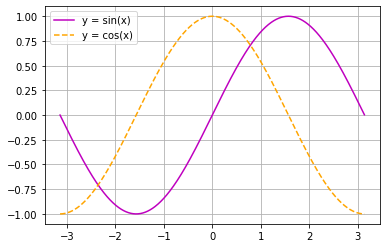

In [9]:
x = np.arange(-np.pi, np.pi, 0.01)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y, color = "m")
plt.plot(x,z, linestyle = '--', color="orange")
plt.grid()
plt.legend(["y = sin(x)","y = cos(x)"])
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

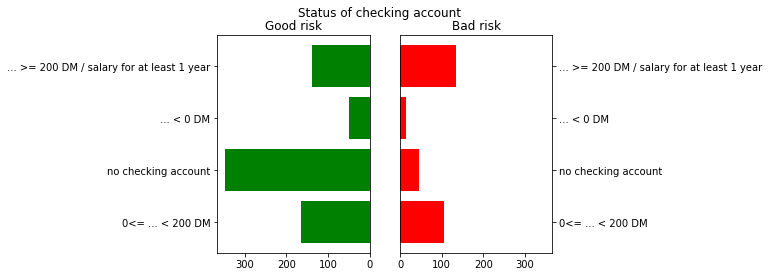

In [10]:
data_g = data[data['credit_risk'] == "good"]
data_b = data[data['credit_risk'] == "bad"]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Status of checking account")
ax1.barh(list(set(data_g['status'])), data_g.groupby('status')['credit_risk'].count(), color = 'g')
ax1.set_title('Good risk')
ax2.barh(list(set(data_b['status'])), data_b.groupby('status')['credit_risk'].count(), color = 'r')
ax2.set_title('Bad risk')
ax2.set_xlim(ax1.get_xlim())
ax1.invert_xaxis()
ax2.yaxis.tick_right()

### Задание 8  (0.5 балла)

In [11]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

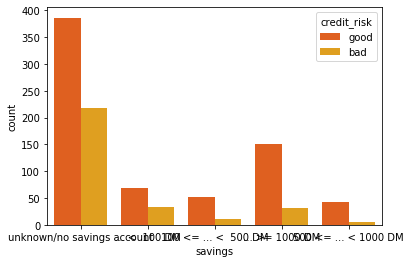

In [12]:
sns.countplot(x='savings', hue='credit_risk', data=data, palette='autumn')
plt.rcParams['figure.figsize']=(12,4)
plt.show()
# код легче предыдущий и график более наглядный, т.к. шкалы не перевернуты и столбцы стоят рядом

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

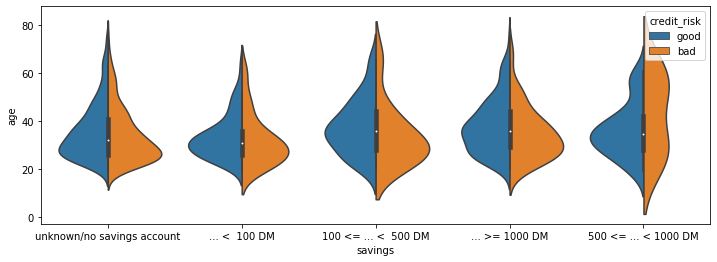

In [13]:
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split = True)
plt.rcParams['figure.figsize']=(20,8)
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

[]

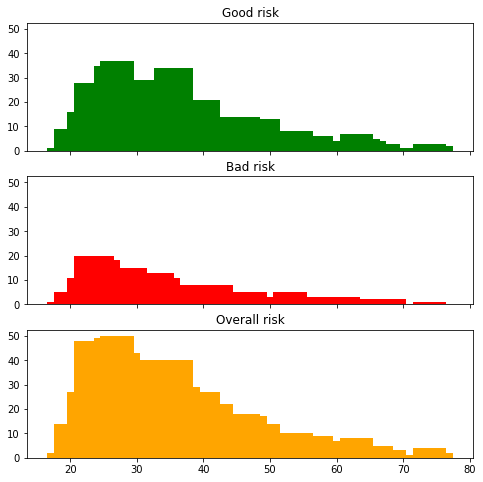

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex = True, sharey = True)
ax1.bar(x = list(set(data_g['age'])), height = data_g.groupby('age')['credit_risk'].count(), color = 'g', width = 5)
ax1.set_title('Good risk')
ax2.bar(x = list(set(data_b['age'])), height = data_b.groupby('age')['credit_risk'].count(), color = 'r', width = 5)
ax2.set_title('Bad risk')
ax3.bar(x = list(set(data['age'])), height = data.groupby('age')['credit_risk'].count(), color = 'orange', width = 5)
ax3.set_title('Overall risk')
plt.rcParams['figure.figsize']=(4,4)
plt.plot()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

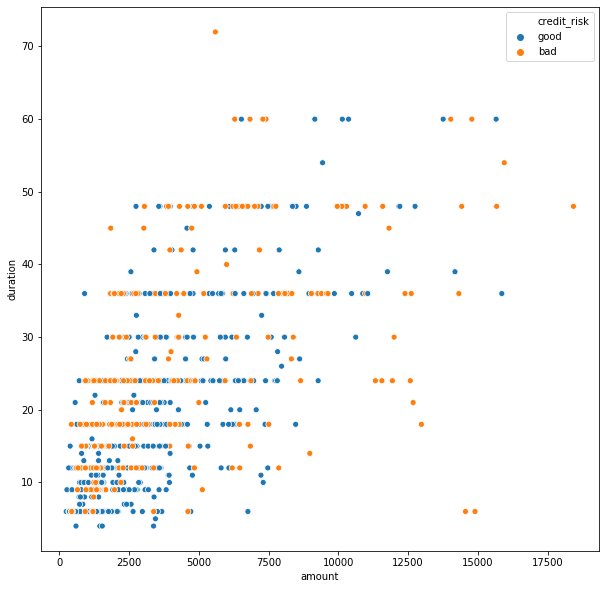

In [21]:
sns.scatterplot(data = data, x = 'amount', y = 'duration', hue = 'credit_risk')
plt.rcParams['figure.figsize']=(10,10)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

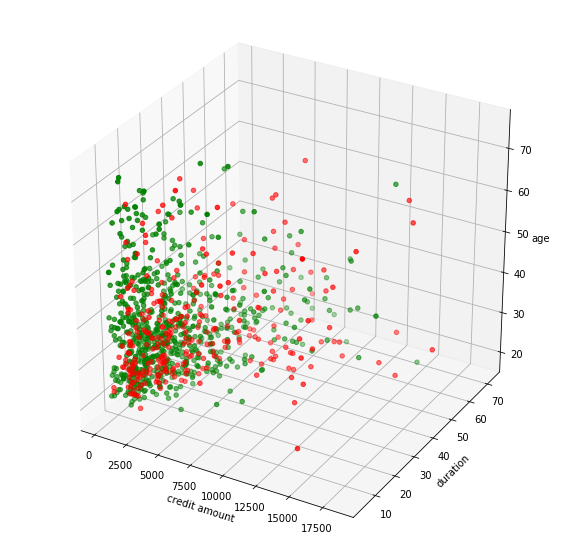

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x1 = data_g['amount']
y1 = data_g['duration']
z1 = data_g['age']

x2 = data_b['amount']
y2 = data_b['duration']
z2 = data_b['age']

ax.set_xlabel("credit amount")
ax.set_ylabel("duration")
ax.set_zlabel("age")

ax.scatter(x1, y1, z1, color = 'g')
ax.scatter(x2,y2,z2, color = 'r')
plt.rcParams['figure.figsize']=(8,8)
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [17]:
data['other_debtors'] = data["other_debtors"].map({"none":'no'})
data1 = pd.DataFrame()
data1["employment_duration"] = data["employment_duration"].map({"unemployed":0,"< 1 yr":1, "1 <= ... < 4 yrs":2, "4 <= ... < 7 yrs":3,">= 7 yrs":4})
data1["installment_rate"] = data["installment_rate"].map({"< 20":0, "20 <= ... < 25":1, "25 <= ... < 35":2,">= 35":3})
data1["present_residence"] = data["present_residence"].map({"< 1 yr":0, "1 <= ... < 4 yrs":1, "4 <= ... < 7 yrs":2,">= 7 yrs":3})
data1["number_credits"] = data["number_credits"].map({"1":0, "2-3":1, "4-5":2,">= 6":3})
data1["people_liable"] = data["people_liable"].map({"0 to 2":0, "3 or more":1})
data1["telephone"] = data["telephone"].map({"no":0, "yes (under customer name)":1})
data1["foreign_worker"] = data["foreign_worker"].map({"no":0, "yes":1})
data1["duration"] = data["duration"]
data1["age"] = data["age"]
data1["amount"] = data["amount"]
data1["credit_risk"] = data["credit_risk"].map({"good":0, "bad":1})
data1 = data1.join(pd.get_dummies(data['status']))
data1 = data1.join(pd.get_dummies(data['savings']))
data1 = data1.join(pd.get_dummies(data['credit_history']))
data1 = data1.join(pd.get_dummies(data['purpose']))
data1 = data1.join(pd.get_dummies(data['personal_status_sex']))
data1 = data1.join(pd.get_dummies(data['other_installment_plans']))
data1 = data1.join(pd.get_dummies(data['housing']))
data1 = data1.join(pd.get_dummies(data['other_debtors']))
data1 = data1.join(pd.get_dummies(data['property']))
data1 = data1.join(pd.get_dummies(data['job']))
data1.head(10)

,employment_duration,installment_rate,present_residence,number_credits,people_liable,telephone,foreign_worker,duration,age,amount,...,rent,no,building soc. savings agr./life insurance,car or other,real estate,unknown / no property,manager/self-empl./highly qualif. employee,skilled employee/official,unemployed/unskilled - non-resident,unskilled - resident
0,1,0,3,0,0,0,0,18,21,1049,...,0,1,0,1,0,0,0,1,0,0
1,2,2,1,1,1,0,0,9,36,2799,...,0,1,0,0,0,1,0,1,0,0
2,3,2,3,0,0,0,0,12,23,841,...,0,1,0,0,0,1,0,0,0,1
3,2,1,1,1,1,0,1,12,39,2122,...,0,1,0,0,0,1,0,0,0,1
4,2,0,3,1,0,0,1,12,38,2171,...,1,1,0,1,0,0,0,0,0,1
5,1,3,2,1,1,0,1,10,48,2241,...,0,1,0,0,0,1,0,0,0,1
6,3,3,3,1,0,0,1,8,39,3398,...,1,1,0,0,0,1,0,0,0,1
7,1,2,3,0,1,0,1,6,40,1361,...,1,1,0,0,0,1,0,0,0,1
8,0,0,3,1,0,0,0,18,65,1098,...,1,1,1,0,0,0,0,0,1,0
9,0,3,3,0,0,0,0,24,23,3758,...,0,1,0,0,1,0,0,0,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [18]:
def predict(Xtrain: np.array, Xtest: np.array, answs: np.array) -> np.array:
    rez = np.empty((0))
    for test_obj in Xtest:#пробегаемся по объектам для теста
        dists = []
        for i_train_obj in range(len(Xtrain)):# пробегаемся по объектам обучения
            dist = 0
            for i in range(len(test_obj)):
                dist+=(Xtrain[i_train_obj][i]-test_obj[i])**2
            dist_ = np.sqrt(dist)# высчитали расстояние от объекта теста до объекта обучения по евклидовой метрике
            dists.append((dist_,answs[i_train_obj])) # добавили это расстояние и ответ для объекта обучения в список
        dists.sort(key = lambda x:x[0]) # сортируем эти тьюплы по расстоянию
        d=dists[:30] # выбираем к=30 ближайших объектов обучения
        answ = 0
        bads = 0
        goods = 0
        for j in d:
            if j[1] == 0:
                goods += 1
            else:
                bads += 1
        if bads > goods:
            answ = 1
        # посмотрели каких ответов из 30 больше(с плохим риском или хорошим) и значение ответов с максимальным количеством и будет ответом для объекта из теста
        rez = np.append(rez, answ)
    return rez
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data1.drop('credit_risk', 1).values
y = data1['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_train, X_test, y_train))

0.664